In [27]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

from mat2list import EEG

In [28]:
data = scipy.io.loadmat("sampleEEGdata.mat")
eeg = EEG(data)

In [29]:
num_frex = 40
min_freq = 2
max_freq = 30

channel2use = "Pz"
chanidx = eeg.labels.index(channel2use)

range_cycles = [3,10]

frex = np.logspace(np.log10(min_freq), np.log10(max_freq), num_frex)
nCycs = np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[1]), num_frex)
time = np.arange(-2, 2, 1/eeg.srate)
half_wave = int((len(time) - 1) / 2)

nWave = len(time)
nData = eeg.pnts * eeg.trials
nConv = nWave + nData - 1

dataX = scipy.fft.fft(np.reshape(eeg.eegdata[chanidx,:,:],(1,nData),order="F"), nConv)

In [30]:
tf  = np.zeros((num_frex,eeg.pnts))

for fi in range(num_frex):

    s = nCycs[fi] / (2*np.pi*frex[fi])
    wavelet = np.exp(2*1j*np.pi*frex[fi]*time) * np.exp(-time**2 / (2*s**2))
    waveletX = scipy.fft.fft(wavelet, nConv)

    waveletX = waveletX / np.max(waveletX)

    as_ = scipy.fft.ifft(waveletX * dataX, nConv)
    as_ = as_[0,half_wave:-half_wave-1]
    as_ = np.reshape(as_, (eeg.pnts,eeg.trials), order="F")
    tf[fi,:] = np.abs(np.mean(np.exp(1j*np.angle(as_)), axis=1))

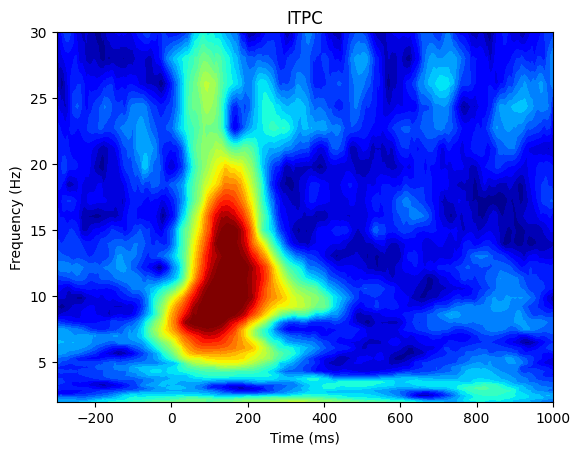

In [34]:
plt.contourf(np.squeeze(eeg.eegtimes), frex, tf, 40,
             vmin=0, vmax=.6, cmap="jet")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency (Hz)")
plt.xlim([-300,1000])
plt.title("ITPC")
plt.show()